In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
# Load the sheet 
df1 = pd.read_excel('Business1.xlsx', sheet_name="Table 1")
df4 = pd.read_excel('Business1.xlsx', sheet_name="Table 4")
df7 = pd.read_excel('Business1.xlsx', sheet_name="Table 7")
df8 = pd.read_excel('Business1.xlsx', sheet_name="Table 8")

### DATA CLEANING

In [144]:
def clean_data(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Space economy", "Government", "Private industries", "Mining",
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def private_only(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Private industries",  
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def clean_employment_compensation(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = [
    "Space economy, private industries",
    "Mining",
    "Utilities",
    "Construction",
    "Manufacturing",
    "Wholesale trade",
    "Retail trade",
    "Transportation and warehousing",
    "Information",
    "Finance, insurance, real estate, rental, and leasing",
    "Professional and business services",
    "Educational services, health care, and social assistance",
    "Arts, entertainment, recreation, accommodation, and food services",
    "Other services, except government",
]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def rename_columns(df):
    df['Category'] = df['Category'].replace({
        'Finance, insurance, real estate, rental, and leasing': 'Finance and Real Estate',
        'Professional and business services': 'Business',
        'Educational services, health care, and social assistance': 'Education and Healthcare',
        'Other services, except government': 'Other Services',
        'Arts, entertainment, recreation, accommodation, and food services': 'Recreation and Entertainment',
        'Space economy, private industries': 'Space economy'
        })
    return df

In [150]:
table1_data = rename_columns(clean_data(df1))
table4_data = rename_columns(clean_data(df4))

In [152]:
table1_industries = table1_data[table1_data["Category"] != "Private industries"]

In [154]:
table1_without_gov = rename_columns(private_only(table1_data))
table4_without_gov = rename_columns(private_only(table4_data))

In [156]:
table7_data = rename_columns(clean_employment_compensation(df7))
table8_data = rename_columns(clean_employment_compensation(df8))

### Data Visualization

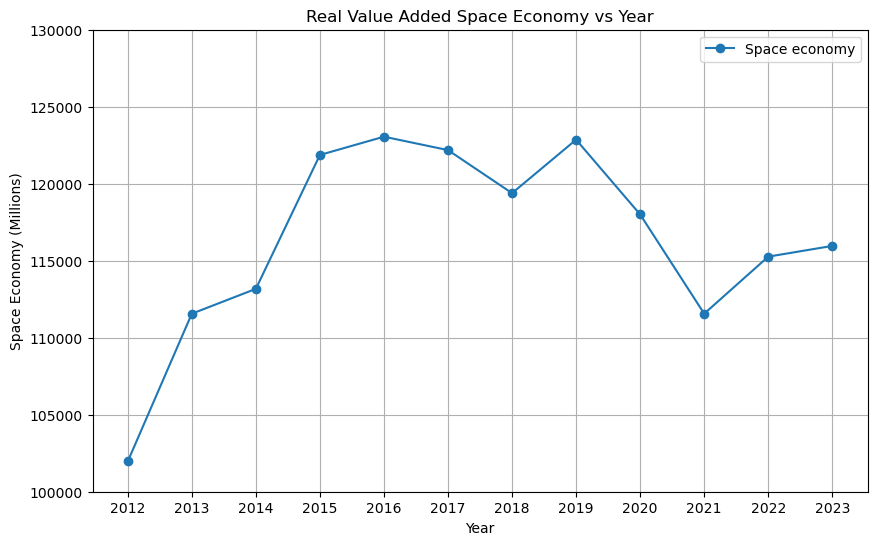

In [24]:
# Pick only the rows we want
df_subset = table1_data[table1_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Value Added Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(100000, 130000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

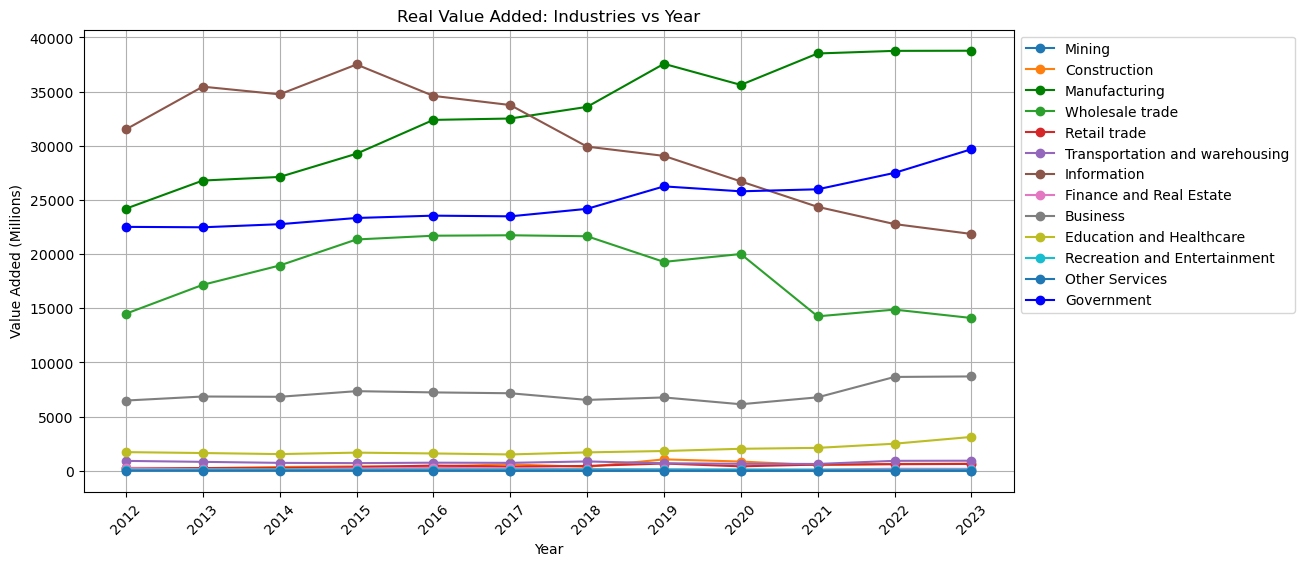

In [158]:
df_t = table1_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Value Added: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

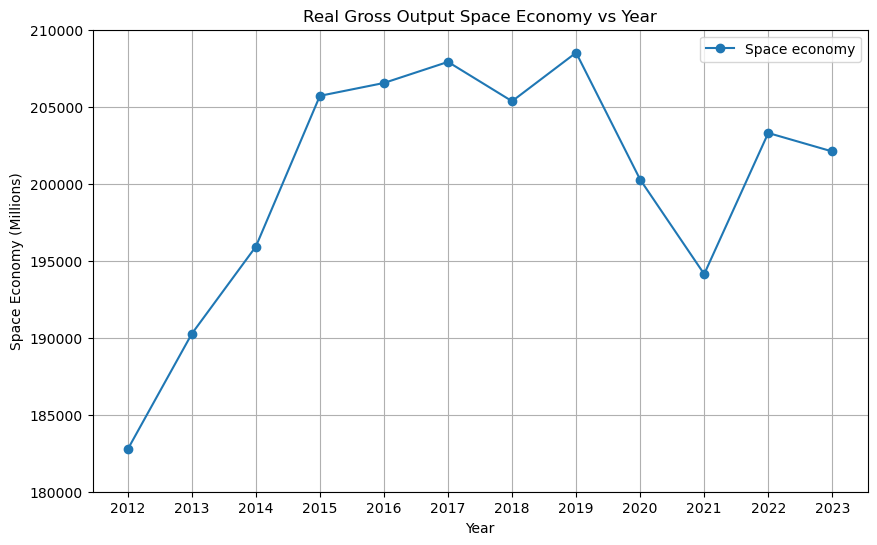

In [160]:
# Pick only the rows we want
df_subset = table4_data[table4_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Gross Output Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(180000, 210000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

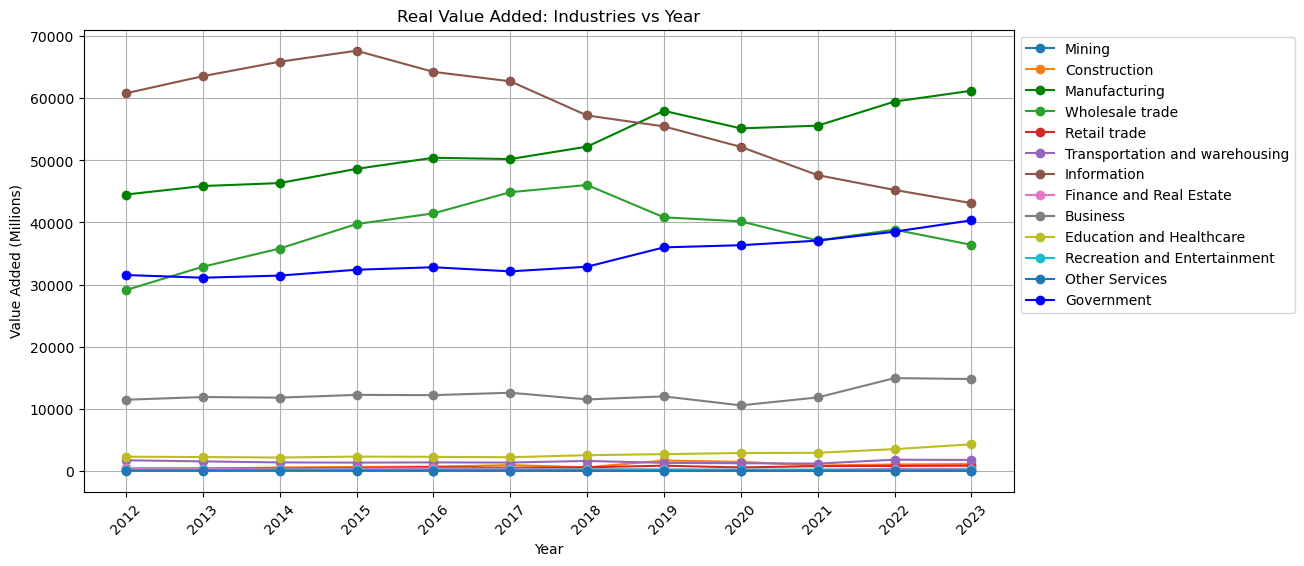

In [162]:
df_t = table4_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Value Added: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

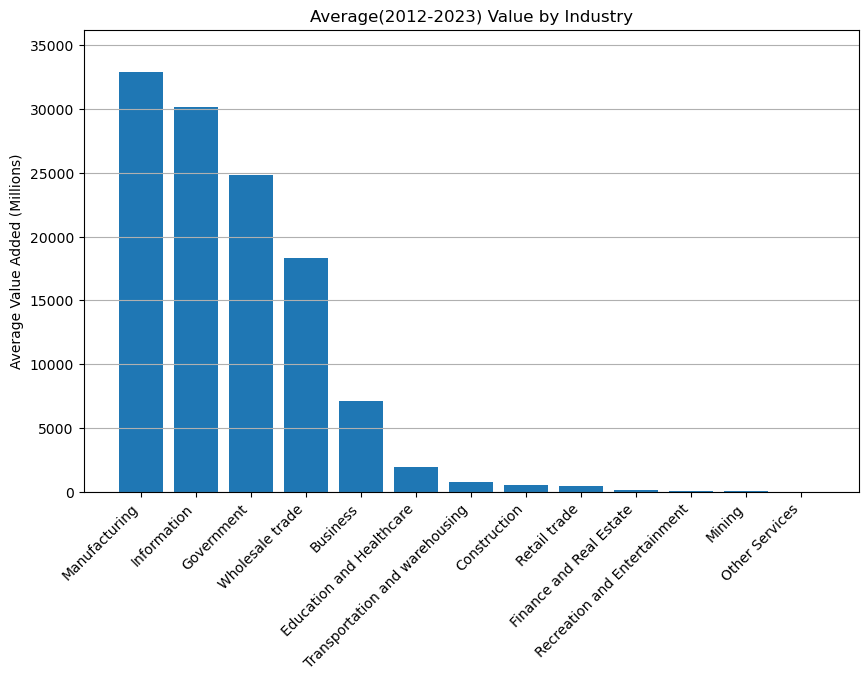

In [163]:
# Filter out the summary rows
rows_to_exclude = [
    "Space economy",
    "Private industries",
    "Space economy excluding satellite television, satellite radio, and educational services"
]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Set index and calculate the mean
df_indexed = filtered_df.set_index('Category')
average_by_industry = df_indexed.mean(axis=1)
average_by_industry_sorted = average_by_industry.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_by_industry_sorted.index, average_by_industry_sorted.values)

# Find the maximum value of the tallest bar
max_value = average_by_industry_sorted.iloc[0]

# Set the y-axis limit to be 20% higher than the max value
plt.ylim(top=max_value * 1.1)

# Add labels and title
plt.ylabel('Average Value Added (Millions)')
plt.title('Average(2012-2023) Value by Industry')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

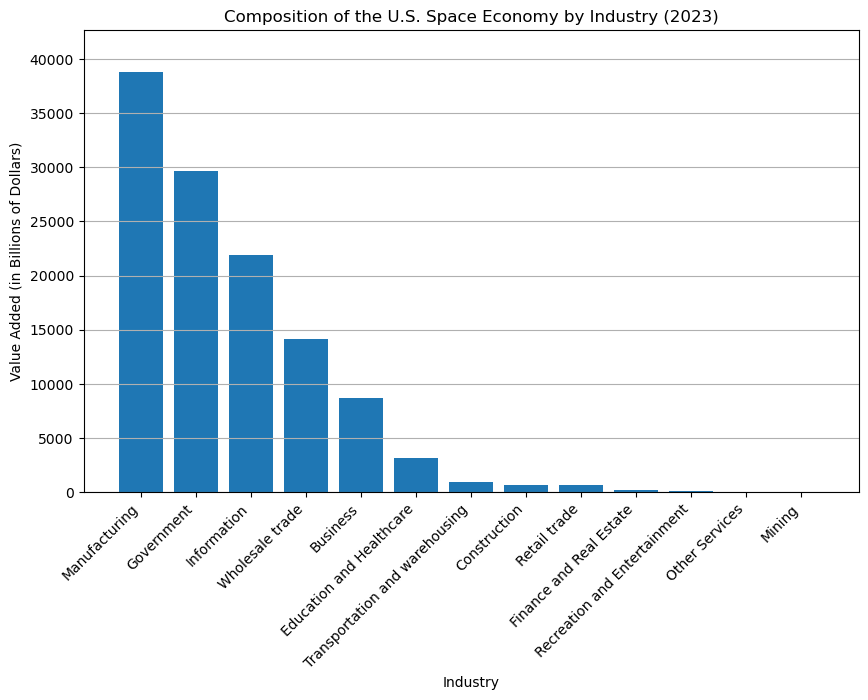

In [166]:
# Define and exclude summary rows
rows_to_exclude = ["Space economy", "Private industries", "Space economy excluding satellite television, satellite radio, and educational services"]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Select data for the latest year and sort it
latest_year_data = filtered_df[['Category', 2023]].sort_values(by=2023, ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(latest_year_data['Category'], latest_year_data[2023])

max_value = latest_year_data[2023].max()
plt.ylim(top=max_value * 1.1) 

# Add labels, title, and formatting
plt.xlabel('Industry')
plt.ylabel('Value Added (in Billions of Dollars)')
plt.title('Composition of the U.S. Space Economy by Industry (2023)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

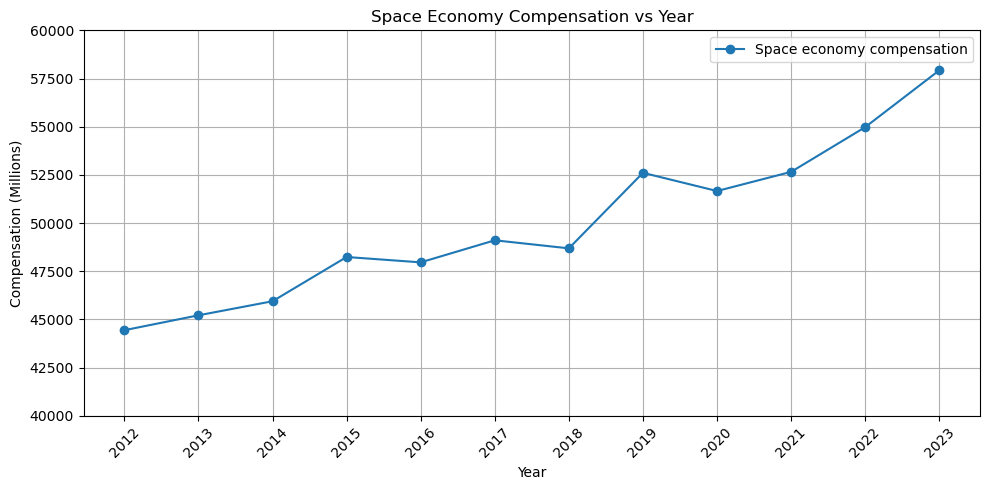

In [329]:
# Set "Category" as index
df_subset = table8_data.set_index("Category")
df_t = df_subset.T
df_t.index = df_t.index.astype(int)

# Plot only Space economy
plt.figure(figsize=(10, 5))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy compensation")
plt.title("Space Economy Compensation vs Year")
plt.xlabel("Year")
plt.ylabel("Compensation (Millions)")
plt.ylim(40000, 60000)
plt.xticks(df_t.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

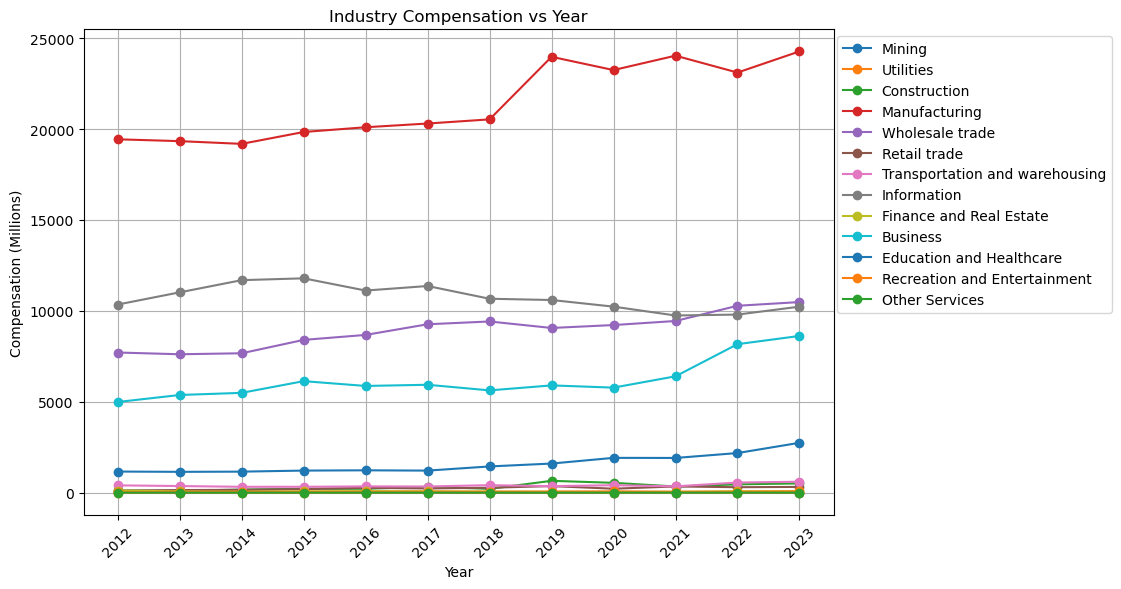

In [170]:
# Plot all other categories
other_cols = [c for c in df_t.columns if c != "Space economy"]

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col)

plt.title("Industry Compensation vs Year")
plt.xlabel("Year")
plt.ylabel("Compensation (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.38, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [305]:
data = {
    "Year": range(2012, 2024),
    "Space_economy": [101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962],
    "Mining": [53,41,51,45,26,10,4,5,2,2,2,2],
    "Construction": [265,239,346,406,403,585,360,1049,850,513,632,646],
    "Manufacturing": [24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773],
    "Wholesale_trade": [14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101],
    "Retail_trade": [219,245,259,331,478,379,442,667,406,570,602,631],
    "Transportation": [909,821,727,703,743,729,859,691,641,627,915,925],
    "Information": [31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859],
    "Finance_RealEstate": [242,145,131,209,255,220,154,133,97,112,183,178],
    "Business": [6481,6852,6826,7346,7232,7153,6539,6767,6139,6776,8659,8706],
    "Education_Healthcare": [1719,1635,1537,1672,1595,1506,1696,1820,2027,2112,2496,3121],
    "Recreation_Entertainment": [82,89,98,86,97,102,106,106,108,87,79,94],
    "Other_Services": [3,4,4,4,5,5,4,5,5,6,7,6],
    "Government": [22512,22474,22759,23333,23548,23485,24177,26249,25795,25981,27496,29679]
}

df = pd.DataFrame(data)

# List of sectors
sectors = ["Construction","Manufacturing","Wholesale_trade","Retail_trade", "Mining",
           "Transportation","Information","Finance_RealEstate","Business",
           "Education_Healthcare","Recreation_Entertainment","Other_Services","Government"]

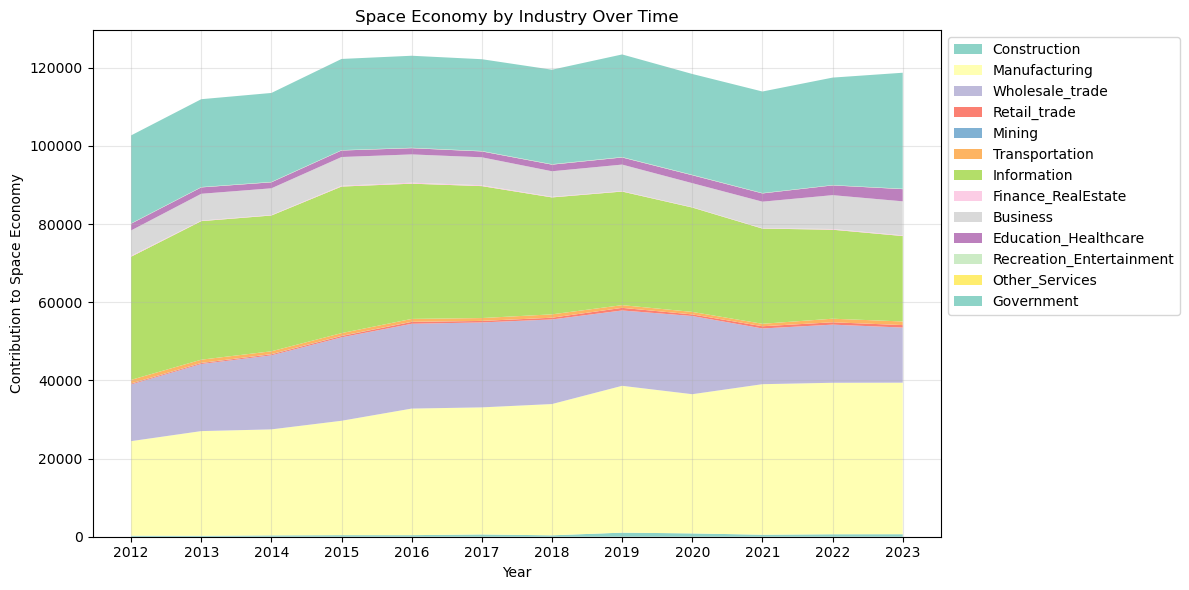

In [307]:
# Stacked area chart of sectors
colors = plt.cm.Set3.colors[:len(sectors)]
plt.figure(figsize=(12,6))
plt.stackplot(df["Year"], [df[sector] for sector in sectors], labels=sectors, colors=colors)
plt.xlabel("Year")
plt.ylabel("Contribution to Space Economy")
plt.title("Space Economy by Industry Over Time")
plt.xticks(df["Year"])  # show all years
plt.grid(alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

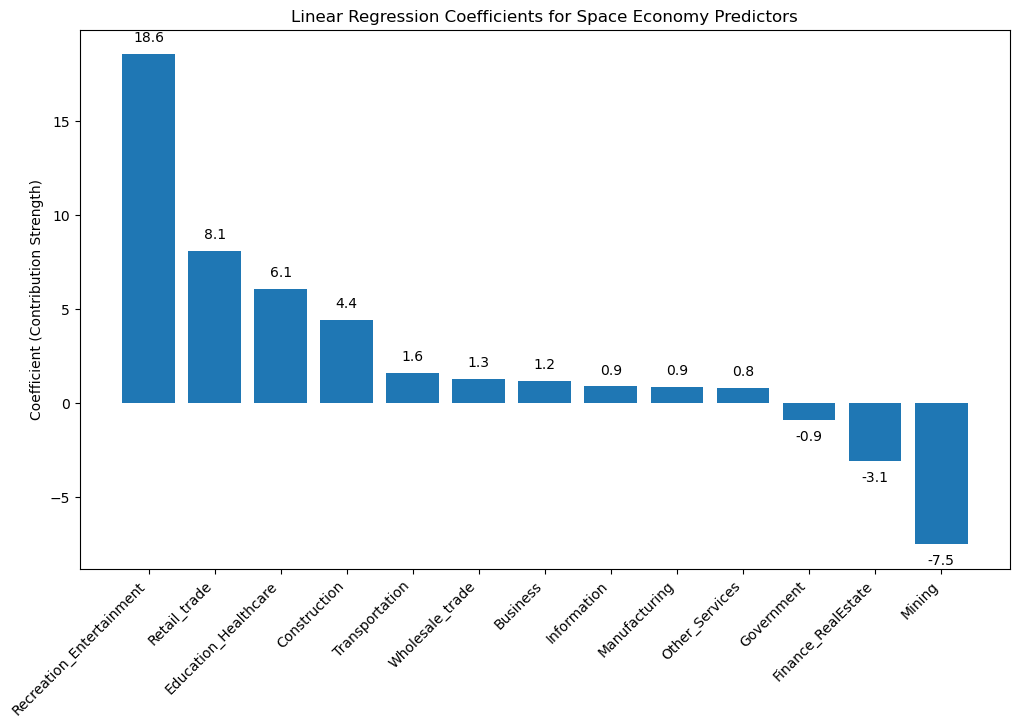

In [321]:
# Train regression model
X = df[sectors]
y = df["Space_economy"]
regression_model = LinearRegression()
regression_model.fit(X, y)

# Bar chart of coefficients
coefficients = pd.Series(regression_model.coef_, index=sectors).sort_values(ascending=False)
plt.figure(figsize=(12,7))
bars = plt.bar(coefficients.index, coefficients.values)

plt.ylabel("Coefficient (Contribution Strength)")
plt.title("Linear Regression Coefficients for Space Economy Predictors")
plt.xticks(rotation=45, ha='right')

# Add numbers on top/bottom of bars
for bar in bars:
    yval = bar.get_height()
    if yval >= 0:
        va = 'bottom'  # positive bars: number above
        offset = 0.5
    else:
        va = 'top'     # negative bars: number below
        offset = -0.5
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f'{yval:.1f}', ha='center', va=va)

plt.show()


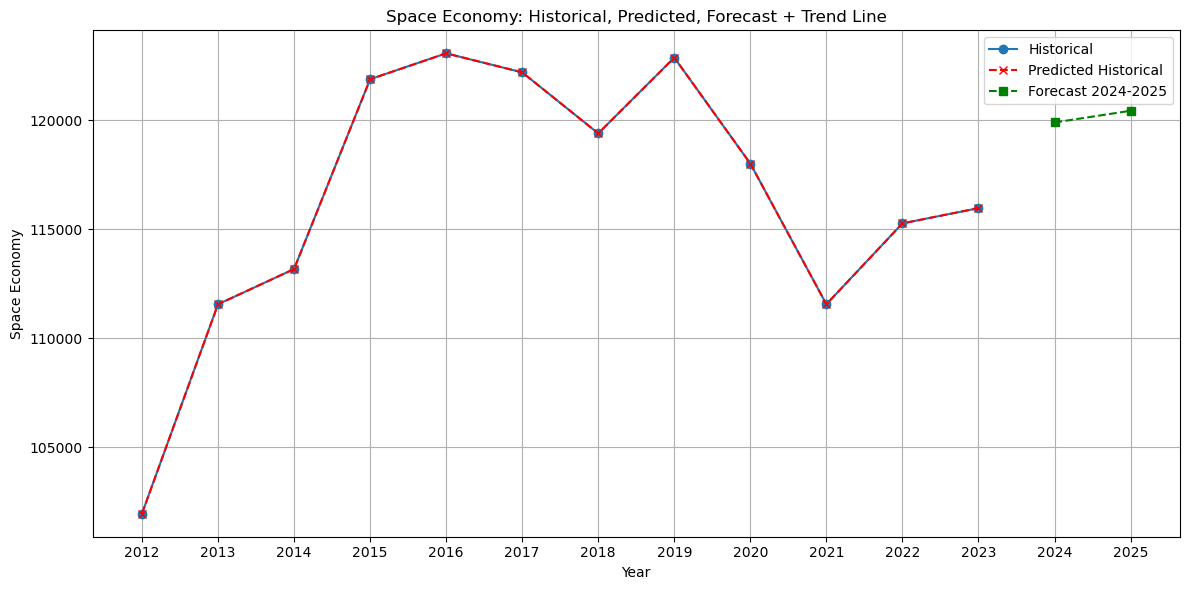

In [325]:
# Historical years for fitting the trend
X_years = df["Year"].values.reshape(-1,1)
y_space = df["Space_economy"].values

# Fit linear regression for line of best fit
fit_model = LinearRegression()
fit_model.fit(X_years, y_space)
y_fit = fit_model.predict(X_years)

# Plot historical + predicted + forecast + line of best fit
plt.figure(figsize=(12,6))

# Historical actual
plt.plot(df["Year"], df["Space_economy"], label="Historical", marker='o')
# Predicted historical from regression on sectors
plt.plot(df["Year"], df["Predicted"], label="Predicted Historical", linestyle='--', marker='x', color='red')
# Forecast 2024-2025
plt.plot(forecast_df.index, forecast_df["Predicted_Space_Economy"], label="Forecast 2024-2025", linestyle='--', marker='s', color='green')


plt.xlabel("Year")
plt.ylabel("Space Economy")
plt.title("Space Economy: Historical, Predicted, Forecast + Trend Line")
plt.xticks(list(df["Year"])+list(forecast_df.index))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [315]:
# Predict
df["Predicted"] = model.predict(X)

# Model evaluation
r2 = r2_score(y, df["Predicted"])
mae = mean_absolute_error(y, df["Predicted"])
rmse = np.sqrt(mean_squared_error(y, df["Predicted"]))

print("R²:", r2)
print("RMSE:", rmse)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

R²: 1.0
RMSE: 1.925037439697619e-11
Coefficients:
Construction: 4.4480482695078445
Manufacturing: 0.8592243777552312
Wholesale_trade: 1.2743799798131374
Retail_trade: 8.119220118211109
Mining: -7.4968427987371395
Transportation: 1.5936375016369613
Information: 0.8932597740936531
Finance_RealEstate: -3.0567100093294384
Business: 1.2098053022835995
Education_Healthcare: 6.077111333518334
Recreation_Entertainment: 18.55821575903386
Other_Services: 0.8163485928753413
Government: -0.9045850679226818
